In [43]:
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
from particle import Particle

In [44]:
### DEFINE HELPER FUNCTIONS
def plot2DHistogram(datax, datay, bins=100, norm="log", label=""):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)

    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    plt.show()

def plot1DHistogram(data,bins,scale='linear',label=""):
    

    
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)
    
    ax.hist(data, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    plt.yscale(scale)
    plt.show()

"""def filterStaus(df):
    for i in len(df['pdgid']):
"""

"def filterStaus(df):\n    for i in len(df['pdgid']):\n"

In [45]:
### Load files 
file_1000_005 = "1000_0.05_reco.json"
file_1000_01 = "1000_0.1_reco.json"
file_1000_1 = "1000_1_reco.json"
file_1000_10 = "1000_10_reco.json"
data_1000_005 = json.load(open(file_1000_005))
data_1000_01 = json.load(open(file_1000_01))
data_1000_1 = json.load(open(file_1000_1))
data_1000_10 = json.load(open(file_1000_10))

### Convert json to pandas dataframe
df_1000_005 = pd.json_normalize(data_1000_005)
df_1000_01 = pd.json_normalize(data_1000_01)
df_1000_1 = pd.json_normalize(data_1000_1)
df_1000_10 = pd.json_normalize(data_1000_10)

### Filter dataframe so each row corresponds to an event 
display(df_1000_005)

# Convert DataFrame to CSV
output_1000_005 = "output_1000_005.csv"
df_1000_005.to_csv(output_1000_005, index=False)

output_1000_01 = "output_1000_01.csv"
df_1000_01.to_csv(output_1000_01, index=False)

output_1000_1 = "output_1000_1.csv"
df_1000_1.to_csv(output_1000_1, index=False)

output_1000_10 = "output_1000_10.csv"
df_1000_10.to_csv(output_1000_10, index=False)

,mcp_pt,mcp_eta,mcp_phi,pdgid,status,prod_vertex,prod_endpoint,prod_time,id,mcp_stau_pt,...,d0_res_match,z0_res_match,x,y,z,time,corrected_time,hit_layer,hit_detector,hit_side
0,"[[0.0, 0.0, 0.0, 0.0, 3849.5431927264503, 3849...","[[100000000000.0, 100000000000.0, -10000000000...","[[0.0, 0.0, 0.0, 0.0, 0.49747505622816945, -2....","[[-13, -13, 13, 13, -1000015, 1000015, 1000049...","[[4, 21, 4, 21, 22, 22, 1, 2, 1, 2, 1, 2, 2, 1...","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.077325098216...","[[25043, 25044, 25045, 25046, 25047, 25048, 25...","[[3849.5431927264503, 3849.5431927264503], [43...",...,[],[],"[[-537.7828199729793, 519.8779620456676, 605.0...","[[661.5867437579227, -1220.6205665799885, 278....","[[2188.8514999999966, -1615.8360081336882, -16...","[[17.523717880249023, 372.7034912109375, 10.22...","[[[-0.10605910944921967, -0.206459821263753, -...","[[[0, 1, 2, 3, 4, 5], [0, 0, 2, 1, 0, 7, 6, 5,...","[[[1, 1, 1, 1, 1, 1], [5, 5, 3, 3, 3, 1, 1, 1,...","[[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0,..."


In [46]:
# constants for indexing
events = 100

series = pd.Series(df_1000_005['LC_stau_pt_match'])
nMatchedStauTracks_1000_005 = series.apply(len).sum()
print(nMatchedStauTracks_1000_005)

series = pd.Series(df_1000_01['LC_stau_pt_match'])
nMatchedStauTracks_1000_01 = series.apply(len).sum()
print(nMatchedStauTracks_1000_01)

series = pd.Series(df_1000_1['LC_stau_pt_match'])
nMatchedStauTracks_1000_1 = series.apply(len).sum()
print(nMatchedStauTracks_1000_1)

series = pd.Series(df_1000_10['LC_stau_pt_match'])
nMatchedStauTracks_1000_10 = series.apply(len).sum()
print(nMatchedStauTracks_1000_10)

series = pd.Series(df_1000_005['LC_daughter_pt_match'])
nMatchedDaughterTracks_1000_005 = series.apply(len).sum()
print(nMatchedDaughterTracks_1000_005)

series = pd.Series(df_1000_01['LC_daughter_pt_match'])
nMatchedDaughterTracks_1000_01 = series.apply(len).sum()
print(nMatchedDaughterTracks_1000_01)

series = pd.Series(df_1000_1['LC_daughter_pt_match'])
nMatchedDaughterTracks_1000_1 = series.apply(len).sum()
print(nMatchedDaughterTracks_1000_1)

series = pd.Series(df_1000_10['LC_daughter_pt_match'])
nMatchedDaughterTracks_1000_10 = series.apply(len).sum()
print(nMatchedDaughterTracks_1000_10)

93
151
201
200
149
123
27
1


In [47]:
### Example track association booleans for event 1 mcp_stau_track_bool, mcp_daughter_track_bool

rows = events
start = 9
end = 16
columns = end - start
# Extract the relevant column names from the original DataFrame
column_names = df_1000_005.columns[start:end]
# Initialize the new DataFrame with the correct shape and column names
df_1000_005_stau_mcps = pd.DataFrame(index=range(rows), columns=column_names)

for i in range(start, end): 
    for j in range (0, events): 
        #print(j)
        #display(df_1000_005.iloc[0][i][j])
        df_1000_005_stau_mcps.iloc[j][i % start] = df_1000_005.iloc[0][i][j]

### Example track association booleans for event 1 mcp_stau_track_bool, mcp_daughter_track_bool

rows = events
start = 9
end = 16
columns = end - start
# Extract the relevant column names from the original DataFrame
column_names = df_1000_01.columns[start:end]
# Initialize the new DataFrame with the correct shape and column names
df_1000_01_stau_mcps = pd.DataFrame(index=range(rows), columns=column_names)

for i in range(start, end): 
    for j in range (0, events): 
        df_1000_01_stau_mcps.iloc[j][i % start] = df_1000_01.iloc[0][i][j]

### Example track association booleans for event 1 mcp_stau_track_bool, mcp_daughter_track_bool

rows = events
start = 9
end = 16
columns = end - start
# Extract the relevant column names from the original DataFrame
column_names = df_1000_1.columns[start:end]
# Initialize the new DataFrame with the correct shape and column names
df_1000_1_stau_mcps = pd.DataFrame(index=range(rows), columns=column_names)

for i in range(start, end): 
    for j in range (0, events): 
        df_1000_1_stau_mcps.iloc[j][i % start] = df_1000_1.iloc[0][i][j]

### Example track association booleans for event 1 mcp_stau_track_bool, mcp_daughter_track_bool

rows = events
start = 9
end = 16
columns = end - start
# Extract the relevant column names from the original DataFrame
column_names = df_1000_10.columns[start:end]
# Initialize the new DataFrame with the correct shape and column names
df_1000_10_stau_mcps = pd.DataFrame(index=range(rows), columns=column_names)

for i in range(start, end): 
    for j in range (0, events): 
        df_1000_10_stau_mcps.iloc[j][i % start] = df_1000_10.iloc[0][i][j]
display(df_1000_10_stau_mcps)

/tmp/ipykernel_927399/1749137498.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_1000_005_stau_mcps.iloc[j][i % start] = df_1000_005.iloc[0][i][j]
/tmp/ipykernel_927399/1749137498.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and e

,mcp_stau_pt,mcp_stau_eta,mcp_stau_phi,mcp_stau_d0,mcp_stau_z0,mcp_stau_track_bool,mcp_stau_track_reconstructable_bool
0,"[2554.4107207360044, 2554.4107207360044]","[-1.2681742578003075, 1.2681742578003075]","[-3.023333697212415, 0.11825895637737811]","[0.0, 0.0]","[0.0, 0.0]","[True, True]","[True, True]"
1,"[4807.970595248272, 4807.9725635048835]","[-0.19426172178197953, 0.19426173045312528]","[-1.686836924033134, 1.4547557261528867]","[0.0, 0.0]","[0.0, 0.0]","[True, True]","[True, True]"
2,"[4893.261460741444, 4893.256438395522]","[0.048357020264217544, -0.048357023137982014]","[-1.0199167086730274, 2.1216759898816067]","[-0.0, 0.0]","[0.0, 0.0]","[True, True]","[True, True]"
3,"[4221.334900787616, 4221.334900787616]","[-0.5593003898001834, 0.5593003898001834]","[2.0872719008378624, -1.0543207527519307]","[0.0, -0.0]","[0.0, 0.0]","[True, True]","[True, True]"
4,"[4800.837015956867, 4872.366685552851, 4795.09...","[0.03657585345840157, -0.04626266686048556, 0....","[-2.2313583681672977, 0.8950678074384256, -2.2...","[0.0, 0.0, -3.9979664171912637, 0.774435546223...","[0.0, 0.0, 0.6498110969127993, -0.129235775901...","[True, True, False, False]","[True, True, False, False]"
...,...,...,...,...,...,...,...
95,"[4513.046742440816, 4513.046742440816]","[0.4106656968147899, -0.41066569681479]","[-2.504587827718025, 0.637004825871768]","[0.0, 0.0]","[0.0, 0.0]","[True, True]","[True, True]"
96,"[4056.4488628050763, 4056.4488628050763]","[-0.633853369248057, 0.633853369248057]","[1.2497826602432967, -1.8918099933464965]","[0.0, 0.0]","[0.0, 0.0]","[True, True]","[True, True]"
97,"[4783.050002306931, 4783.050002306931]","[0.2197283120490861, -0.2197283120490861]","[0.6060389225275906, -2.5355537310622025]","[0.0, 0.0]","[0.0, 0.0]","[True, True]","[True, True]"
98,"[4891.7965423139685, 4891.7965423139685]","[0.05418489255749431, -0.05418489255749433]","[-2.032616583406197, 1.108976070183596]","[0.0, 0.0]","[0.0, 0.0]","[True, True]","[True, True]"


In [48]:
### Example track association booleans for event 1 mcp_stau_track_bool, mcp_daughter_track_bool
rows = events
start = 16
end = 23
columns = end - start
# Extract the relevant column names from the original DataFrame
column_names = df_1000_005.columns[start:end]
# Initialize the new DataFrame with the correct shape and column names
df_1000_005_daughter_mcps = pd.DataFrame(index=range(rows), columns=column_names)

for i in range(start, end): 
    for j in range (0, events): 
        df_1000_005_daughter_mcps.iloc[j][i % start] = df_1000_005.iloc[0][i][j]

rows = events
start = 16
end = 23
columns = end - start
# Extract the relevant column names from the original DataFrame
column_names = df_1000_01.columns[start:end]
# Initialize the new DataFrame with the correct shape and column names
df_1000_01_daughter_mcps = pd.DataFrame(index=range(rows), columns=column_names)

for i in range(start, end): 
    for j in range (0, events): 
        df_1000_01_daughter_mcps.iloc[j][i % start] = df_1000_01.iloc[0][i][j]

rows = events
start = 16
end = 23
columns = end - start
# Extract the relevant column names from the original DataFrame
column_names = df_1000_1.columns[start:end]
# Initialize the new DataFrame with the correct shape and column names
df_1000_1_daughter_mcps = pd.DataFrame(index=range(rows), columns=column_names)

for i in range(start, end): 
    for j in range (0, events): 
        df_1000_1_daughter_mcps.iloc[j][i % start] = df_1000_1.iloc[0][i][j]

### Example track association booleans for event 1 mcp_stau_track_bool, mcp_daughter_track_bool
rows = events
start = 16
end = 23
columns = end - start
# Extract the relevant column names from the original DataFrame
column_names = df_1000_10.columns[start:end]
# Initialize the new DataFrame with the correct shape and column names
df_1000_10_daughter_mcps = pd.DataFrame(index=range(rows), columns=column_names)

for i in range(start, end): 
    for j in range (0, events): 
        #display(df_1000_005.iloc[0][i][j])
        df_1000_10_daughter_mcps.iloc[j][i % start] = df_1000_10.iloc[0][i][j]
display(df_1000_10_daughter_mcps)

/tmp/ipykernel_927399/3790079165.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_1000_005_daughter_mcps.iloc[j][i % start] = df_1000_005.iloc[0][i][j]
/tmp/ipykernel_927399/3790079165.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step a

,mcp_daughter_pt,mcp_daughter_eta,mcp_daughter_phi,mcp_daughter_d0,mcp_daughter_z0,mcp_daughter_track_bool,mcp_daughter_track_reconstructable_bool
0,"[1961.4096212839777, 1961.4096212839777, 2148....","[-1.1889717276117144, -1.1889717276117144, 1.0...","[3.0316521969242145, 3.0316521969242145, 0.253...","[-1067.6900187873914, -1065.5285646564785, 300...","[-3430.159453411816, -3477.49649063533, 1445.0...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal..."
1,"[3373.223852953048, 3373.223852953048, 1323.00...","[-0.10853689632238428, -0.10853689632238428, -...","[-1.5777900511792382, -1.5777900511792382, 1.1...","[1462.3656564012256, 1458.8209950433604, -7354...","[-15.30579644783711, -15.332035826223546, 0.05...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal..."
2,"[387.1281267989478, 387.1281267989478, 341.199...","[0.2623677817602681, 0.2623677817602681, 0.675...","[-0.3447699010227521, -0.3447699010227521, 2.0...","[18648.255524297685, 18610.371045234006, -684....","[48.19891861230258, 47.29960900387209, -179.14...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal..."
3,"[1412.1350018985693, 1258.8339812023755, 1258....","[-0.8577153149894652, 0.424007928293955, 0.424...","[2.193458442438659, -0.7088311990957121, -0.70...","[1895.3244977291756, 3679.6476873305764, 3684....","[-2939.0544208349966, 535.8916998135428, 537.4...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal..."
4,"[812.3275209416879, 2012.9715700846277]","[-0.2074468563607034, -0.2688178109740001]","[-1.8380968451185218, 0.9910656985320823]","[18185.006802056017, 829.0512829591845]","[36.72599189752691, -14.125842647681395]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal..."
...,...,...,...,...,...,...,...
95,"[4229.312152743454, 2010.360941810561]","[0.3573488903969391, -0.1568351346233256]","[-2.462112856884981, 0.6268769629563584]","[374.30054673067247, -28.733643212704628]","[222.7466414571595, -14.142410517976487]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal..."
96,"[1488.0111673417036, 317.70534202183904]","[-0.4902613631719803, 1.103656212606374]","[0.9497491286571726, -2.5894405671175544]","[-488.596791938976, -1406.7549318733275]","[-122.34678764223008, 596.537066564584]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal..."
97,"[3855.588489301532, 778.2726404049702]","[0.23698990433642106, -0.6299248050103547]","[0.5029071135578204, -2.3170986843091637]","[-570.1517731989435, 1362.9821858035843]","[33.846688593305316, -237.62376529117137]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal..."
98,"[3693.04552680664, 3693.04552680664, 2773.7853...","[0.16013706450414322, 0.16013706450414322, 0.0...","[-1.985071226024418, -1.985071226024418, 1.265...","[56.31761870260558, 55.915296343021964, 2730.5...","[0.8127206552276931, 1.6900016454869444, -0.60...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal..."


In [51]:
df_2stau_1000_005 = []
df_2stau_1000_01 = []
df_2stau_1000_1 = []
df_2stau_1000_10 = []
for i in range(0,100):
    for j in range(0, len(df_1000_005.loc[0][43][i])):
        df_2stau_1000_005.append(df_1000_005.loc[0][43][i][j])
    for j in range(0, len(df_1000_01.loc[0][43][i])):
        df_2stau_1000_01.append(df_1000_01.loc[0][43][i][j])
    for j in range(0, len(df_1000_1.loc[0][43][i])):
        df_2stau_1000_1.append(df_1000_1.loc[0][43][i][j])
    for j in range(0, len(df_1000_10.loc[0][43][i])):
        df_2stau_1000_10.append(df_1000_10.loc[0][43][i][j])
print(len(df_2stau_1000_10))
display(df_2stau_1000_10)
print(type(df_2stau_1000_10))

200


/tmp/ipykernel_927399/2967895361.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for j in range(0, len(df_1000_005.loc[0][43][i])):
/tmp/ipykernel_927399/2967895361.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_2stau_1000_005.append(df_1000_005.loc[0][43][i][j])
/tmp/ipykernel_927399/2967895361.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for j in range(0, len(df_1000_01.loc[0][43][i])):
/tmp/ipykernel_927399/296

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 F

<class 'list'>


In [56]:
display(df_1000_01['LC_stau_hit_x'])

0    [[-7.714501808418822, -8.228729838435264, -13....
Name: LC_stau_hit_x, dtype: object

In [61]:
### Example track association booleans for event 1 mcp_stau_track_bool, mcp_daughter_track_bool
start = 23
end = 43
columns = end - start
# Extract the relevant column names from the original DataFrame
column_names = df_1000_005.columns[start:end]
# Initialize the new DataFrame with the correct shape and column names
df_1000_005_stau_matched = pd.DataFrame(index=range(nMatchedStauTracks_1000_005), columns=column_names)

for i in range(start, end): 
    print("i", i)
    for j in range (0, nMatchedStauTracks_1000_005): 
        df_1000_005_stau_matched.loc[j][i % start] = df_1000_005.iloc[0][i][j]
df_1000_005_stau_matched['2 staus matched'] = df_2stau_1000_005
columns = end - start
# Extract the relevant column names from the original DataFrame
column_names = df_1000_01.columns[start:end]
# Initialize the new DataFrame with the correct shape and column names
df_1000_01_stau_matched = pd.DataFrame(index=range(nMatchedStauTracks_1000_01), columns=column_names)

for i in range(start, end): 
    for j in range (0, nMatchedStauTracks_1000_01): 
        df_1000_01_stau_matched.loc[j][i % start] = df_1000_01.iloc[0][i][j]
df_1000_01_stau_matched['2 staus matched'] = df_2stau_1000_01
columns = end - start
# Extract the relevant column names from the original DataFrame
column_names = df_1000_1.columns[start:end]
# Initialize the new DataFrame with the correct shape and column names
df_1000_1_stau_matched = pd.DataFrame(index=range(nMatchedStauTracks_1000_1), columns=column_names)

for i in range(start, end): 
    for j in range (0, nMatchedStauTracks_1000_1): 
        df_1000_1_stau_matched.loc[j][i % start] = df_1000_1.iloc[0][i][j]
df_1000_1_stau_matched['2 staus matched'] = df_2stau_1000_1
columns = end - start
# Extract the relevant column names from the original DataFrame
column_names = df_1000_10.columns[start:end]
# Initialize the new DataFrame with the correct shape and column names
df_1000_10_stau_matched = pd.DataFrame(index=range(nMatchedStauTracks_1000_10), columns=column_names)

for i in range(start, end):
    for j in range (0, nMatchedStauTracks_1000_10):
        df_1000_10_stau_matched.loc[j][i % start] = df_1000_10.iloc[0][i][j]
df_1000_10_stau_matched['2 staus matched'] = df_2stau_1000_10
display(df_1000_10_stau_matched)

i 23
i 24
i 25
i 26
i 27
i 28
i 29
i 30
i 31
i 32
i 33
i 34
i 35
i 36
i 37
i 38
i 39
i 40
i 41
i 42


/tmp/ipykernel_927399/2039227565.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_1000_005_stau_matched.loc[j][i % start] = df_1000_005.iloc[0][i][j]
/tmp/ipykernel_927399/2039227565.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and

,LC_stau_pt_match,LC_stau_track_pt,LC_stau_track_eta,LC_stau_eta_match,LC_stau_track_theta,LC_stau_phi_match,LC_stau_ndf,LC_stau_chi2,LC_stau_d0,LC_stau_z0,...,LC_stau_pixel_nhits,LC_stau_inner_nhits,LC_stau_outer_nhits,LC_stau_pt_res,LC_stau_dr,LC_stau_hit_r,LC_stau_hit_x,LC_stau_hit_y,LC_stau_hit_z,2 staus matched
0,2554.410721,[159.8671617940335],[-1.2680358659590731],-1.268174,[2.5930098597304525],[-3.022824287414551],[9],[11.561955451965332],[-0.011996821500360966],[-0.008357303217053413],...,[6],[1],[0],[0.9374152478705653],[0.0005278737006900892],"[30.376949573491483, 32.441839090121455, 48.98...","[-30.165, -32.214999999999996, -48.64148085802...","[-3.5821558300057834, -3.8297125935679173, -5....","[-49.71053120863103, -53.09466835162995, -80.1...",False
1,4807.970595,[173.6066724357151],[-0.19429889845807796],-0.194262,[1.7638841077996887],[-1.6862962245941162],[13],[6.001661777496338],[-0.015691237524151802],[0.002745937556028366],...,[8],[1],[0],[0.9638919022077026],[0.000541976003712239],"[30.369948412324618, 32.43337912764333, 51.168...","[-3.5222920899974435, -3.757373635593071, -5.9...","[-30.165, -32.214999999999996, -50.82417236281...","[-5.932776356853115, -6.341120362850453, -10.0...",False
2,4807.972564,[203.9027349485936],[0.19418668542620818],0.194262,[1.377818674685298],[1.4554054737091064],[13],[15.278630256652832],[-0.023941494524478912],[0.004004570189863443],...,[8],[1],[0],[0.9575907033046891],[0.0006540670018266298],"[30.36958952205739, 32.4340841943431, 52.18563...","[3.519196319936999, 3.763454865643668, 6.04301...","[30.165, 32.214999999999996, 51.83456938269078...","[5.933433868689669, 6.343707507632665, 10.1975...",False
3,4893.261461,[7423.08792712209],[0.04833532194501181],0.048357,[1.5224798148601948],[-1.0199306011199951],[29],[19.787105560302734],[0.0016599567607045174],[0.0008402465027756989],...,[11],[3],[3],[0.5170021031325225],[2.57646490196082e-05],"[30.54728990153877, 32.62318546212788, 52.0256...","[15.99456857895267, 17.081056203039616, 27.232...","[-26.025193492111303, -27.794059593463377, -44...","[1.4835980480799527, 1.5730006185798229, 2.513...",False
4,4893.256438,[429.5174363017897],[-0.04835192478524611],-0.048357,[1.6191294221874095],[2.1214029788970947],[13],[9.323509216308594],[0.006103530526161194],[0.0016562179662287235],...,[8],[1],[0],[0.9122225778049298],[0.000273058585041369],"[30.54600177679795, 32.622200360029424, 51.184...","[-15.987016427673097, -17.07528141405052, -26....","[26.028321695596397, 27.7964515893825, 43.6126...","[-1.4771728682459706, -1.5729474144466438, -2....",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4783.050002,[539.3690908322894],[-0.21978088501673332],-0.219728,[1.7888289138887898],[-2.5353283882141113],[13],[7.272523403167725],[-0.0055503095500171185],[0.00290221581235528],...,[8],[1],[0],[0.8872332318139796],[0.00023139428712279464],"[30.86476159941174, 32.96254423517015, 51.1776...","[-25.36798815225342, -27.091574838012946, -42....","[-17.581202623701586, -18.777004427008396, -29...","[-6.836620781554116, -7.298595461857121, -11.3...",False
196,4891.796542,[5647.780408490637],[0.054170192467054776],0.054185,[1.516652607832626],[-2.0325891971588135],[25],[30.231435775756836],[-0.004210149869322777],[0.003926617093384266],...,[9],[3],[3],[0.15454115060538978],[3.1082136424104135e-05],"[30.23715958582542, 32.29279696550446, 51.2626...","[-13.472451944692166, -14.39782475735413, -22....","[-27.069888407908785, -28.90549044925227, -45....","[1.640082356574393, 1.7517097107204738, 2.7773...",False
197,4891.796542,[4883.14132068396],[-0.05418661179471635],-0.054185,[1.6249564410164463],[1.108938217163086],[23],[25.839582443237305],[-0.0004141354002058506],[1.5460447684745304e-05],...,[8],[3],[3],[0.001769333935935651],[3.789204320647749e-05],"[30.23781655138373, 32.2923402670541, 51.72752...","[13.48122284332481, 14.391733603271021, 23.046...","[27.066255382740945, 28.908013487884, 46.309

In [62]:
filtered_1000_10_stau_matched = df_1000_10_stau_matched[df_1000_10_stau_matched['2 staus matched']]
display(filtered_1000_10_stau_matched)

,LC_stau_pt_match,LC_stau_track_pt,LC_stau_track_eta,LC_stau_eta_match,LC_stau_track_theta,LC_stau_phi_match,LC_stau_ndf,LC_stau_chi2,LC_stau_d0,LC_stau_z0,...,LC_stau_pixel_nhits,LC_stau_inner_nhits,LC_stau_outer_nhits,LC_stau_pt_res,LC_stau_dr,LC_stau_hit_r,LC_stau_hit_x,LC_stau_hit_y,LC_stau_hit_z,2 staus matched
99,4599.236939,[4289.409838543725],[0.35912563828334476],0.3591,[1.2191502304846313],[-1.64004647731781],[21],[198.1182403564453],[0.006205345503985882],[0.0003894389665219933],...,[7],[3],[3],[0.06736489207257544],[8.106452469734106e-05],"[30.23763138311814, 32.291483887227216, 51.197...","[-2.0945468868781862, -2.2211948674204183, -3....","[-30.165, -32.214999999999996, -51.07538290872...","[11.092454798687811, 11.849738663310983, 18.78...",True
109,3402.292729,[1063.5858065359814],[-0.9067152310018196],-0.906612,[2.3739532057679287],[-3.130474090576172],[11],[13.628756523132324],[-4.760106094181538e-06],[0.009373071603477001],...,[6],[2],[0],[0.6873914470617579],[0.00011093214353547237],"[30.166875055490227, 32.21697018956416, 52.435...","[-30.165, -32.214999999999996, -52.43188429790...","[-0.3363415132846029, -0.3562908857465516, -0....","[-31.240031402100072, -33.372275350462004, -54...",True
145,4717.173499,[6943.590818710735],[-0.21228471967498397],-0.212284,[1.7815043496168572],[1.6349437236785889],[21],[15.810163497924805],[0.004175524227321148],[-0.002598915947601199],...,[7],[3],[3],[0.4719812234486924],[1.0276286893235979e-05],"[30.227794891248234, 32.281352465813654, 51.20...","[-1.9473980043568264, -2.0686933127202813, -3....","[30.165, 32.214999999999996, 51.10173317976765...","[-6.46726001167064, -6.908699838135987, -10.95...",True
147,4717.10897,[6943.590818710735],[-0.21228471967498397],-0.212286,[1.7815043496168572],[1.6349437236785889],[21],[15.810163497924805],[0.004175524227321148],[-0.002598915947601199],...,[7],[3],[3],[0.47200136002994514],[0.00010932403128681354],"[30.227794891248234, 32.281352465813654, 51.20...","[-1.9473980043568264, -2.0686933127202813, -3....","[30.165, 32.214999999999996, 51.10173317976765...","[-6.46726001167064, -6.908699838135987, -10.95...",True
149,4270.378151,[4512.8386454203555],[-0.5361681538606307],-0.536143,[2.0829800639618026],[1.453150749206543],[21],[40.09126281738281],[-0.0004975432530045509],[0.00028275512158870697],...,[8],[3],[2],[0.056777288904814475],[4.208972592773135e-05],"[30.375362956476494, 32.43964206004054, 52.169...","[3.5686761884044103, 3.8110565442606092, 6.121...","[30.165, 32.214999999999996, 51.8091353498795,...","[-17.072006045264693, -18.244232997010577, -29...",True
169,1817.58583,[766.9648342136743],[-1.6483279436870095],-1.648326,[2.7614934094258983],[-1.6301279067993164],[9],[6.770518779754639],[-0.021906502544879913],[-0.006743335630744696],...,[3],[4],[0],[0.5780310225516669],[0.000376247430227578],"[32.83530036508207, 111.9194078051858, 112.741...","[-1.9698460496528936, -6.665290637607386, -6.7...","[-32.776159881929814, -111.7207578929704, -112...","[-82.19, -280.14, -282.19, -324.72360661001176...",True
199,4291.403124,[1738.5753705587272],[-0.5260823863840282],-0.526041,[2.074166889213082],[-0.583092451095581],[17],[34.28978729248047],[-0.001873739529401064],[0.005288249347358942],...,[9],[2],[0],[0.5948701811154692],[4.193422395629686e-05],"[30.792159439811524, 32.88577946513256, 51.863...","[25.701938380601817, 27.45214578249881, 43.291...","[-16.957813728382597, -18.106744129350446, -28...","[-16.946192184122474, -18.11786250875025, -28....",True


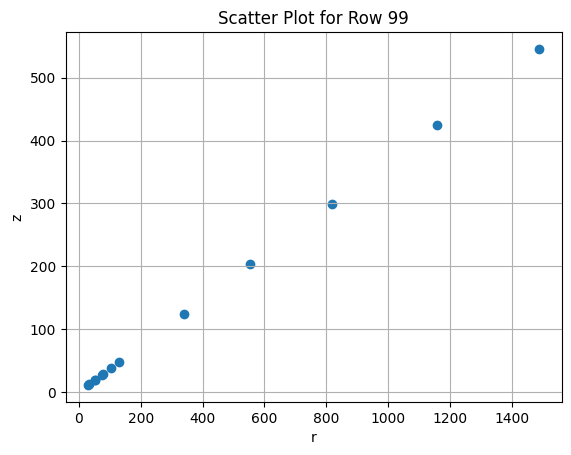

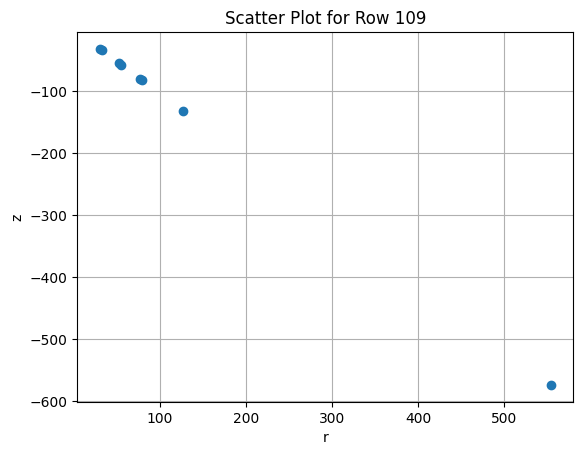

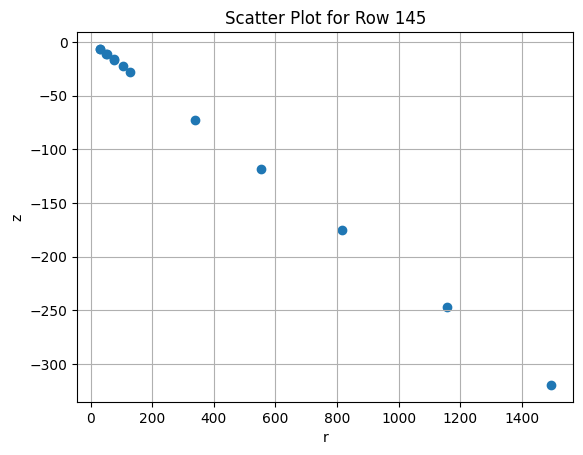

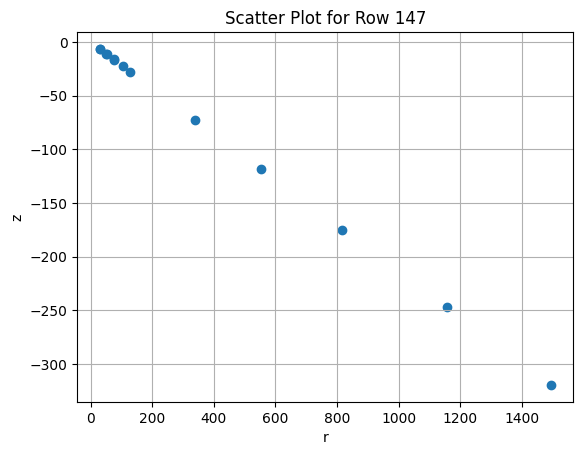

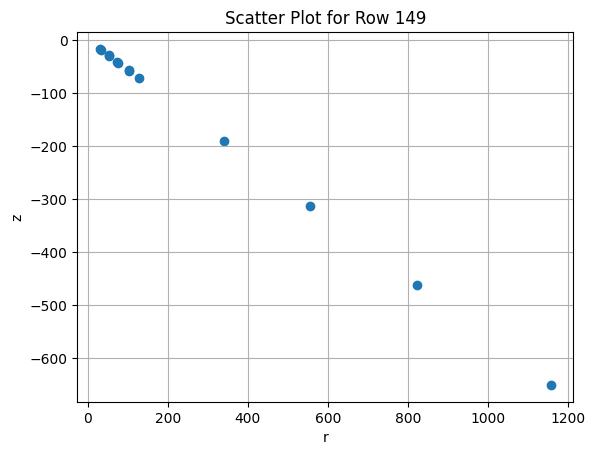

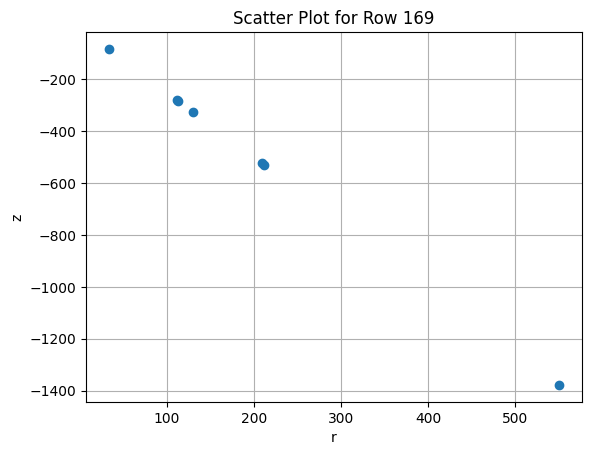

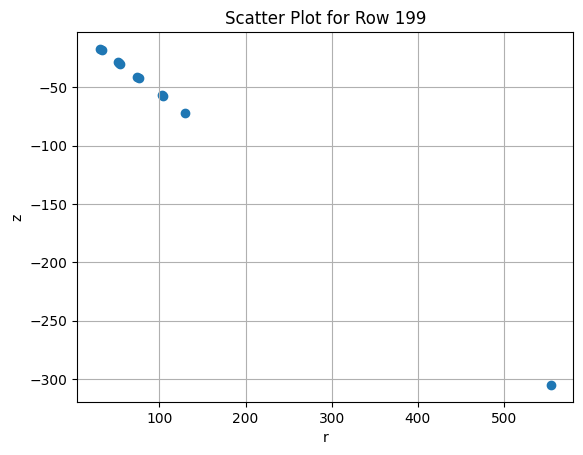

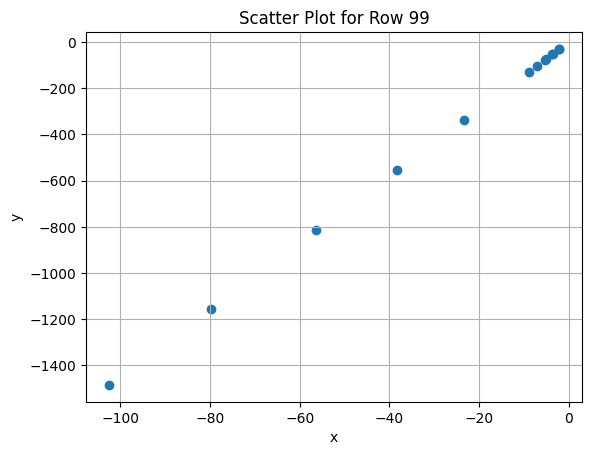

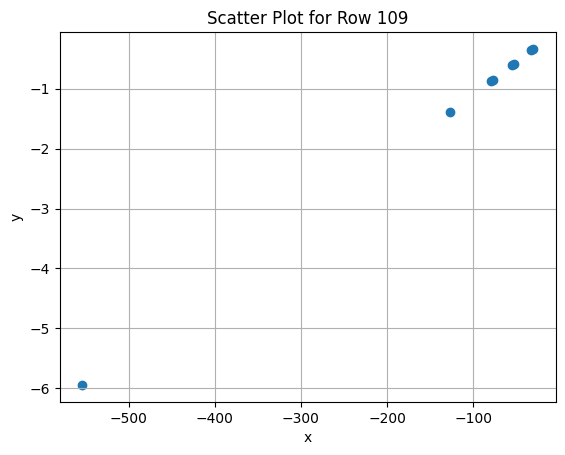

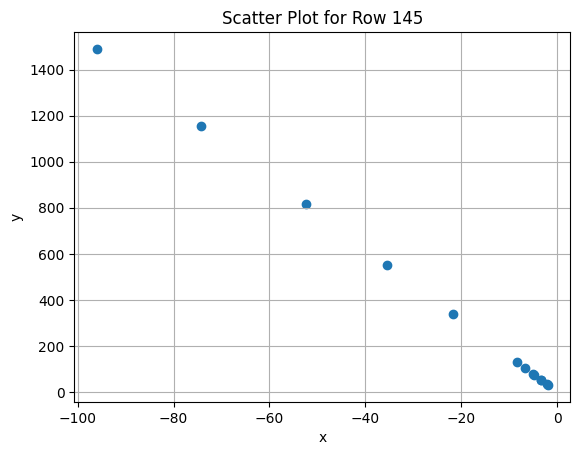

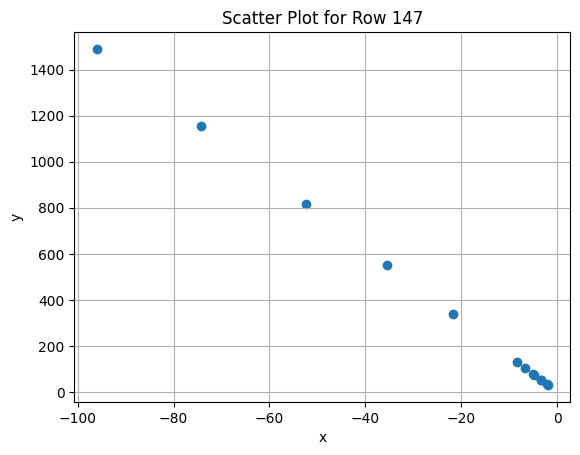

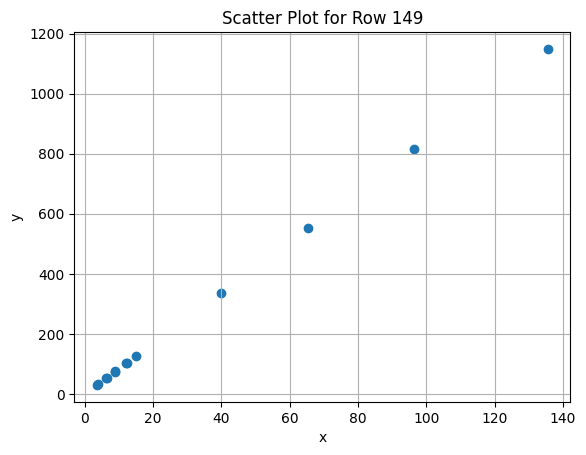

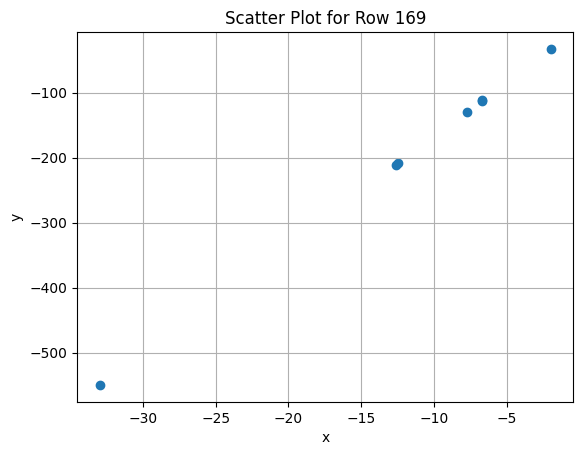

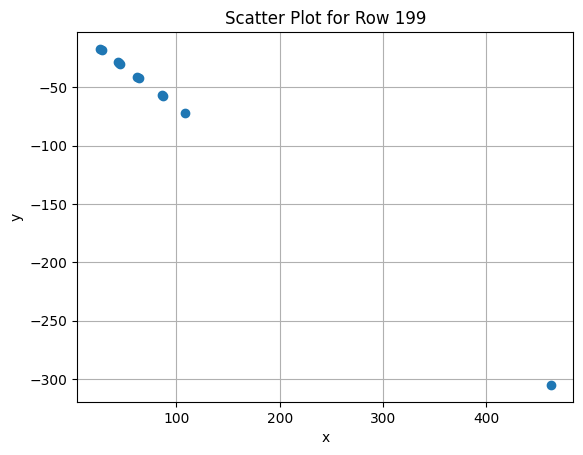

In [64]:
### Make scatter plots of hit position (r, z, and x, y) for tracks with two staus matched
### to make sure they are not kinked tracks
# Loop through each row and create a scatter plot
for index, row in filtered_1000_10_stau_matched.iterrows():
    r_values = row['LC_stau_hit_r']
    z_values = row['LC_stau_hit_z']
    
    plt.figure()
    plt.scatter(r_values, z_values)
    plt.title(f'Scatter Plot for Row {index}')
    plt.xlabel('r')
    plt.ylabel('z')
    plt.grid(True)
    plt.show()
for index, row in filtered_1000_10_stau_matched.iterrows():
    x_values = row['LC_stau_hit_x']
    y_values = row['LC_stau_hit_y']
    
    plt.figure()
    plt.scatter(x_values, y_values)
    plt.title(f'Scatter Plot for Row {index}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

In [53]:
### Example track association booleans for event 1 mcp_stau_track_bool, mcp_daughter_track_bool
start = 44
end = 60
columns = end - start
# Extract the relevant column names from the original DataFrame
column_names = df_1000_005.columns[start:end]
# Initialize the new DataFrame with the correct shape and column names
df_1000_005_daughter_matched = pd.DataFrame(index=range(nMatchedDaughterTracks_1000_005), columns=column_names)

for i in range(start, end): 
    for j in range (0, nMatchedDaughterTracks_1000_005): 
        if (isinstance(df_1000_005.iloc[0][i][j], float)):
            df_1000_005_daughter_matched.loc[j][i % start] = df_1000_005.iloc[0][i][j]
        else:
            df_1000_005_daughter_matched.loc[j][i % start] = df_1000_005.iloc[0][i][j][0]

# Extract the relevant column names from the original DataFrame
column_names = df_1000_01.columns[start:end]
# Initialize the new DataFrame with the correct shape and column names
df_1000_01_daughter_matched = pd.DataFrame(index=range(nMatchedDaughterTracks_1000_01), columns=column_names)

for i in range(start, end): 
    for j in range (0, nMatchedDaughterTracks_1000_01): 
        if (isinstance(df_1000_01.iloc[0][i][j], float)):
            df_1000_01_daughter_matched.loc[j][i % start] = df_1000_01.iloc[0][i][j]
        else:
            df_1000_01_daughter_matched.loc[j][i % start] = df_1000_01.iloc[0][i][j][0]

# Extract the relevant column names from the original DataFrame
column_names = df_1000_1.columns[start:end]
# Initialize the new DataFrame with the correct shape and column names
df_1000_1_daughter_matched = pd.DataFrame(index=range(nMatchedDaughterTracks_1000_1), columns=column_names)

for i in range(start, end): 
    for j in range (0, nMatchedDaughterTracks_1000_1): 
        if (isinstance(df_1000_1.iloc[0][i][j], float)):
            df_1000_1_daughter_matched.loc[j][i % start] = df_1000_1.iloc[0][i][j]
        else:
            df_1000_1_daughter_matched.loc[j][i % start] = df_1000_1.iloc[0][i][j][0]

# Extract the relevant column names from the original DataFrame
column_names = df_1000_10.columns[start:end]
# Initialize the new DataFrame with the correct shape and column names
df_1000_10_daughter_matched = pd.DataFrame(index=range(nMatchedDaughterTracks_1000_10), columns=column_names)

for i in range(start, end): 
    for j in range (0, nMatchedDaughterTracks_1000_10): 
        if (isinstance(df_1000_10.iloc[0][i][j], float)):
            df_1000_10_daughter_matched.loc[j][i % start] = df_1000_10.iloc[0][i][j]
        else:
            df_1000_10_daughter_matched.loc[j][i % start] = df_1000_10.iloc[0][i][j][0]
display(df_1000_01_daughter_matched)

/tmp/ipykernel_927399/1112740740.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (isinstance(df_1000_005.iloc[0][i][j], float)):
/tmp/ipykernel_927399/1112740740.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_1000_005_daughter_matched.loc[j][i % start] = df_1000_005.iloc[0][i][j]
/tmp/ipykernel_927399/1112740740.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the 

,LC_daughter_pt_match,LC_daughter_track_pt,LC_daughter_track_eta,LC_daughter_eta_match,LC_daughter_track_theta,LC_daughter_phi_match,LC_daughter_ndf,LC_daughter_chi2,LC_daughter_d0,LC_daughter_z0,LC_daughter_nhits,LC_daughter_pixel_nhits,LC_daughter_inner_nhits,LC_daughter_outer_nhits,LC_daughter_pt_res,LC_daughter_dr
0,389.21491,204.153244,-0.012101,-0.01239,1.582897,1.755028,3,5.740731,-31.139591,46.91209,4,0,3,1,0.475474,0.003034
1,3280.21774,272.77069,-0.248922,-0.249229,1.817186,2.238018,3,1.167838,15.780374,4.734978,4,0,4,0,0.916844,0.001313
2,3280.21774,272.77069,-0.248922,-0.249229,1.817186,2.238018,3,1.167838,15.780374,4.734978,4,0,4,0,0.916844,0.001313
3,3312.077608,2104.262819,0.075454,0.075495,1.495414,-0.827862,1,3.595612,21.233252,47.748989,3,0,1,2,0.36467,0.001654
4,2896.477548,1275.885943,0.351073,0.351796,1.22672,-2.851149,1,0.214204,-11.415895,62.389519,3,0,2,1,0.559504,0.000723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,1525.6685,604.819894,1.014039,1.015179,0.695977,0.227097,3,0.953055,-3.120194,26.900425,4,2,2,0,0.603571,0.001695
119,1767.705795,865.317479,0.214355,0.213871,1.358064,-1.776835,11,22.206009,3.954806,-4.142568,8,4,3,1,0.510486,0.000485
120,242.029249,110.532213,0.773951,0.771328,0.864236,1.91854,19,25.628117,-2.975031,-6.801388,12,9,3,0,0.543311,0.002665
121,4589.781023,4361.677858,0.301269,0.30124,1.273984,-1.037442,23,19.042574,0.306768,-0.083979,14,8,3,3,0.049698,0.000166


/tmp/ipykernel_659080/806500277.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(bin_column)


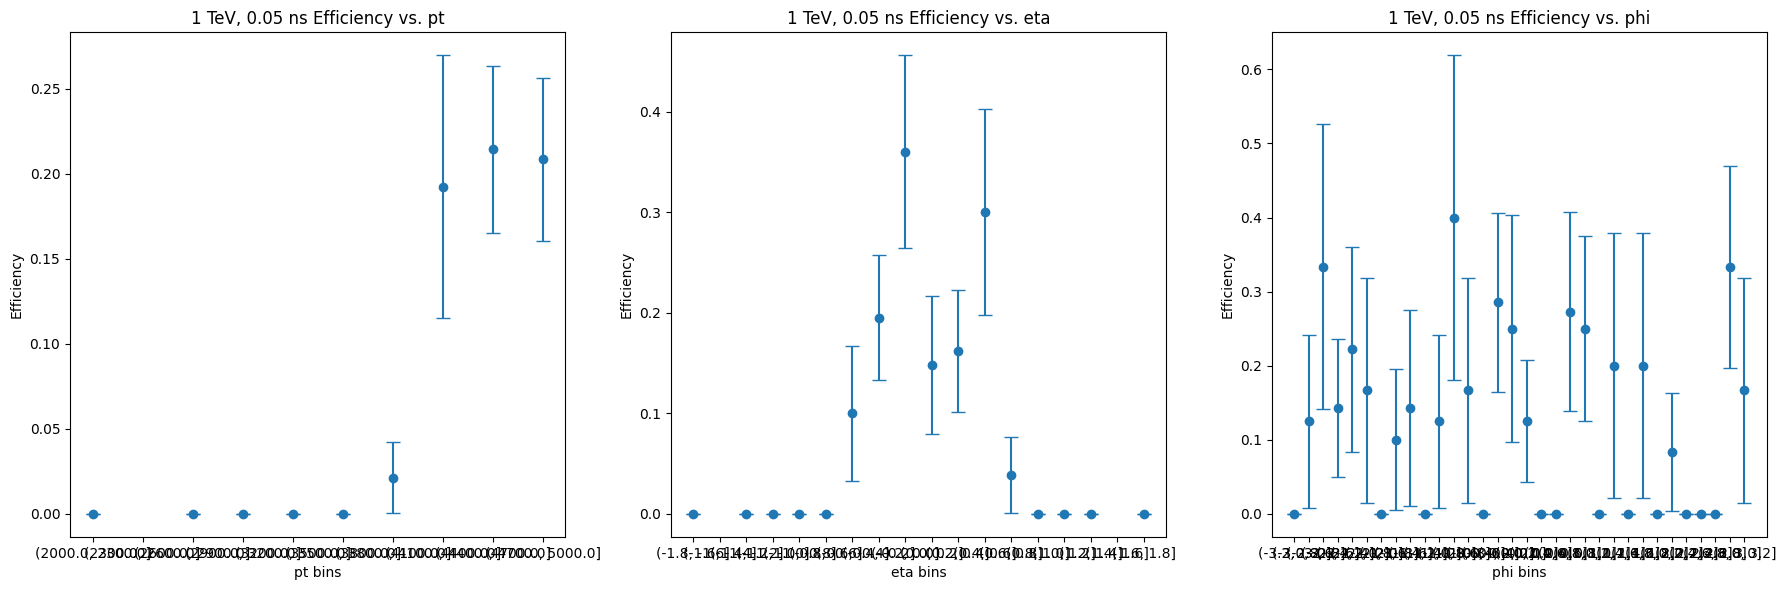

/tmp/ipykernel_659080/806500277.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(bin_column)


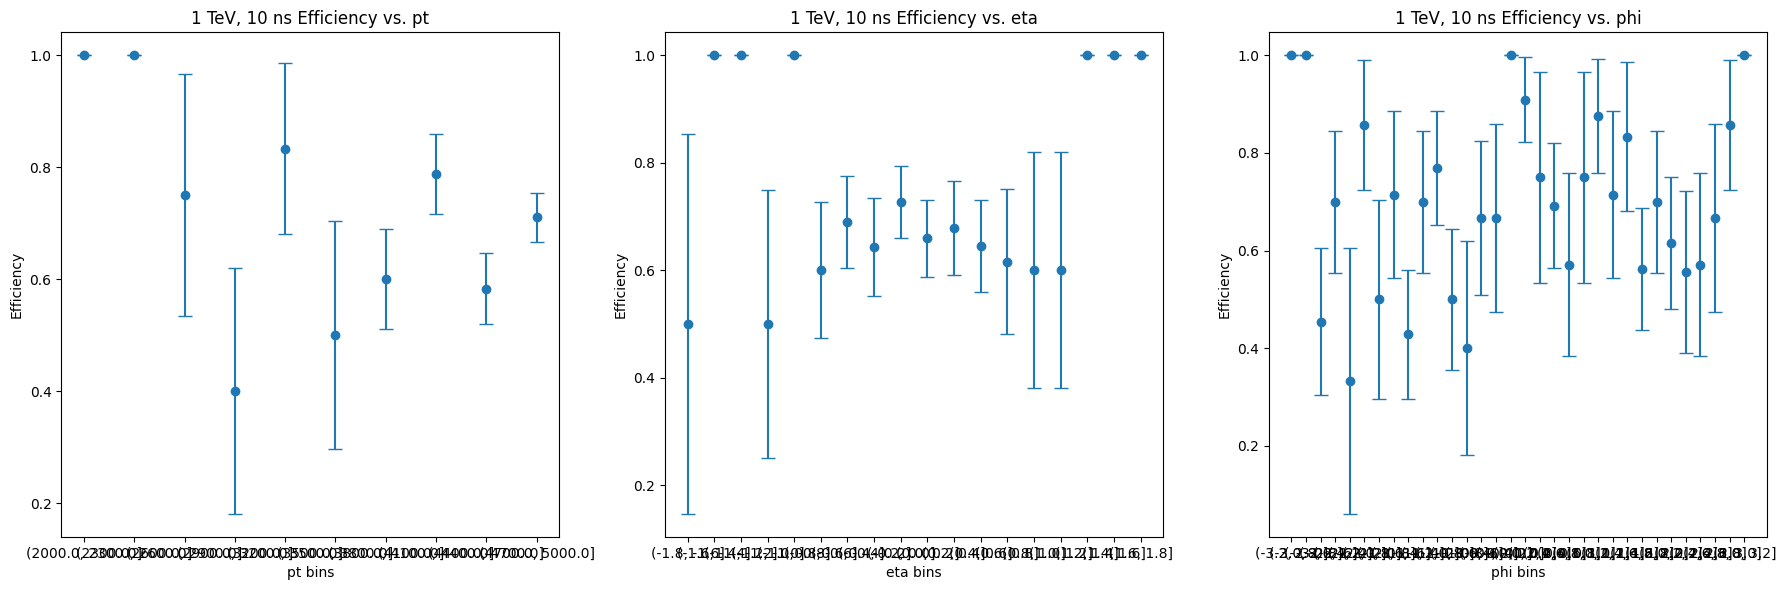

In [155]:
# Flatten the DataFrame
df_flat = pd.DataFrame({
    'mcp_stau_pt': np.concatenate(df_1000_005_stau_mcps['mcp_stau_pt'].values),
    'mcp_stau_eta': np.concatenate(df_1000_005_stau_mcps['mcp_stau_eta'].values),
    'mcp_stau_phi': np.concatenate(df_1000_005_stau_mcps['mcp_stau_phi'].values),
    'mcp_stau_track_bool': np.concatenate(df_1000_005_stau_mcps['mcp_stau_track_bool'].values),
    'mcp_stau_track_reconstructable_bool': np.concatenate(df_1000_005_stau_mcps['mcp_stau_track_reconstructable_bool'].values)
})

# Define bins
pt_bins = np.linspace(2000, 5000, 11)
eta_bins = np.linspace(-2, 2, 21)
phi_bins = np.linspace(-3.2, 3.2, 33)

# Bin the data
df_flat['pt_bin'] = pd.cut(df_flat['mcp_stau_pt'], bins=pt_bins)
df_flat['eta_bin'] = pd.cut(df_flat['mcp_stau_eta'], bins=eta_bins)
df_flat['phi_bin'] = pd.cut(df_flat['mcp_stau_phi'], bins=phi_bins)

# Calculate efficiency and errors for each bin
def calculate_efficiency_with_errors(df, bin_column):
    grouped = df.groupby(bin_column)
    efficiency = grouped['mcp_stau_track_bool'].mean()
    counts = grouped['mcp_stau_track_bool'].count()
    errors = np.sqrt(efficiency * (1 - efficiency) / counts)
    return efficiency, errors

efficiency_pt, errors_pt = calculate_efficiency_with_errors(df_flat, 'pt_bin')
efficiency_eta, errors_eta = calculate_efficiency_with_errors(df_flat, 'eta_bin')
efficiency_phi, errors_phi = calculate_efficiency_with_errors(df_flat, 'phi_bin')

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot efficiency vs. pt
axes[0].errorbar(x=efficiency_pt.index.astype(str), y=efficiency_pt, yerr=errors_pt, fmt='o', capsize=5)
axes[0].set_title('1 TeV, 0.05 ns Efficiency vs. pt')
axes[0].set_xlabel('pt bins')
axes[0].set_ylabel('Efficiency')

# Plot efficiency vs. eta
axes[1].errorbar(x=efficiency_eta.index.astype(str), y=efficiency_eta, yerr=errors_eta, fmt='o', capsize=5)
axes[1].set_title('1 TeV, 0.05 ns Efficiency vs. eta')
axes[1].set_xlabel('eta bins')
axes[1].set_ylabel('Efficiency')

# Plot efficiency vs. phi
axes[2].errorbar(x=efficiency_phi.index.astype(str), y=efficiency_phi, yerr=errors_phi, fmt='o', capsize=5)
axes[2].set_title('1 TeV, 0.05 ns Efficiency vs. phi')
axes[2].set_xlabel('phi bins')
axes[2].set_ylabel('Efficiency')

plt.tight_layout()
plt.show()



# Flatten the DataFrame
df_flat = pd.DataFrame({
    'mcp_stau_pt': np.concatenate(df_1000_10_stau_mcps['mcp_stau_pt'].values),
    'mcp_stau_eta': np.concatenate(df_1000_10_stau_mcps['mcp_stau_eta'].values),
    'mcp_stau_phi': np.concatenate(df_1000_10_stau_mcps['mcp_stau_phi'].values),
    'mcp_stau_track_bool': np.concatenate(df_1000_10_stau_mcps['mcp_stau_track_bool'].values),
    'mcp_stau_track_reconstructable_bool': np.concatenate(df_1000_10_stau_mcps['mcp_stau_track_reconstructable_bool'].values)
})

# Define bins
pt_bins = np.linspace(2000, 5000, 11)
eta_bins = np.linspace(-2, 2, 21)
phi_bins = np.linspace(-3.2, 3.2, 33)

# Bin the data
df_flat['pt_bin'] = pd.cut(df_flat['mcp_stau_pt'], bins=pt_bins)
df_flat['eta_bin'] = pd.cut(df_flat['mcp_stau_eta'], bins=eta_bins)
df_flat['phi_bin'] = pd.cut(df_flat['mcp_stau_phi'], bins=phi_bins)

# Calculate efficiency and errors for each bin
def calculate_efficiency_with_errors(df, bin_column):
    grouped = df.groupby(bin_column)
    efficiency = grouped['mcp_stau_track_bool'].mean()
    counts = grouped['mcp_stau_track_bool'].count()
    errors = np.sqrt(efficiency * (1 - efficiency) / counts)
    return efficiency, errors

efficiency_pt, errors_pt = calculate_efficiency_with_errors(df_flat, 'pt_bin')
efficiency_eta, errors_eta = calculate_efficiency_with_errors(df_flat, 'eta_bin')
efficiency_phi, errors_phi = calculate_efficiency_with_errors(df_flat, 'phi_bin')

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot efficiency vs. pt
axes[0].errorbar(x=efficiency_pt.index.astype(str), y=efficiency_pt, yerr=errors_pt, fmt='o', capsize=5)
axes[0].set_title('1 TeV, 10 ns Efficiency vs. pt')
axes[0].set_xlabel('pt bins')
axes[0].set_ylabel('Efficiency')

# Plot efficiency vs. eta
axes[1].errorbar(x=efficiency_eta.index.astype(str), y=efficiency_eta, yerr=errors_eta, fmt='o', capsize=5)
axes[1].set_title('1 TeV, 10 ns Efficiency vs. eta')
axes[1].set_xlabel('eta bins')
axes[1].set_ylabel('Efficiency')

# Plot efficiency vs. phi
axes[2].errorbar(x=efficiency_phi.index.astype(str), y=efficiency_phi, yerr=errors_phi, fmt='o', capsize=5)
axes[2].set_title('1 TeV, 10 ns Efficiency vs. phi')
axes[2].set_xlabel('phi bins')
axes[2].set_ylabel('Efficiency')

plt.tight_layout()
plt.show()

247
50


/tmp/ipykernel_659080/1852869790.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reconstructable['pt_bin'] = pd.cut(df_reconstructable['mcp_stau_pt'], bins=pt_bins)
/tmp/ipykernel_659080/1852869790.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reconstructable['eta_bin'] = pd.cut(df_reconstructable['mcp_stau_eta'], bins=eta_bins)
/tmp/ipykernel_659080/1852869790.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

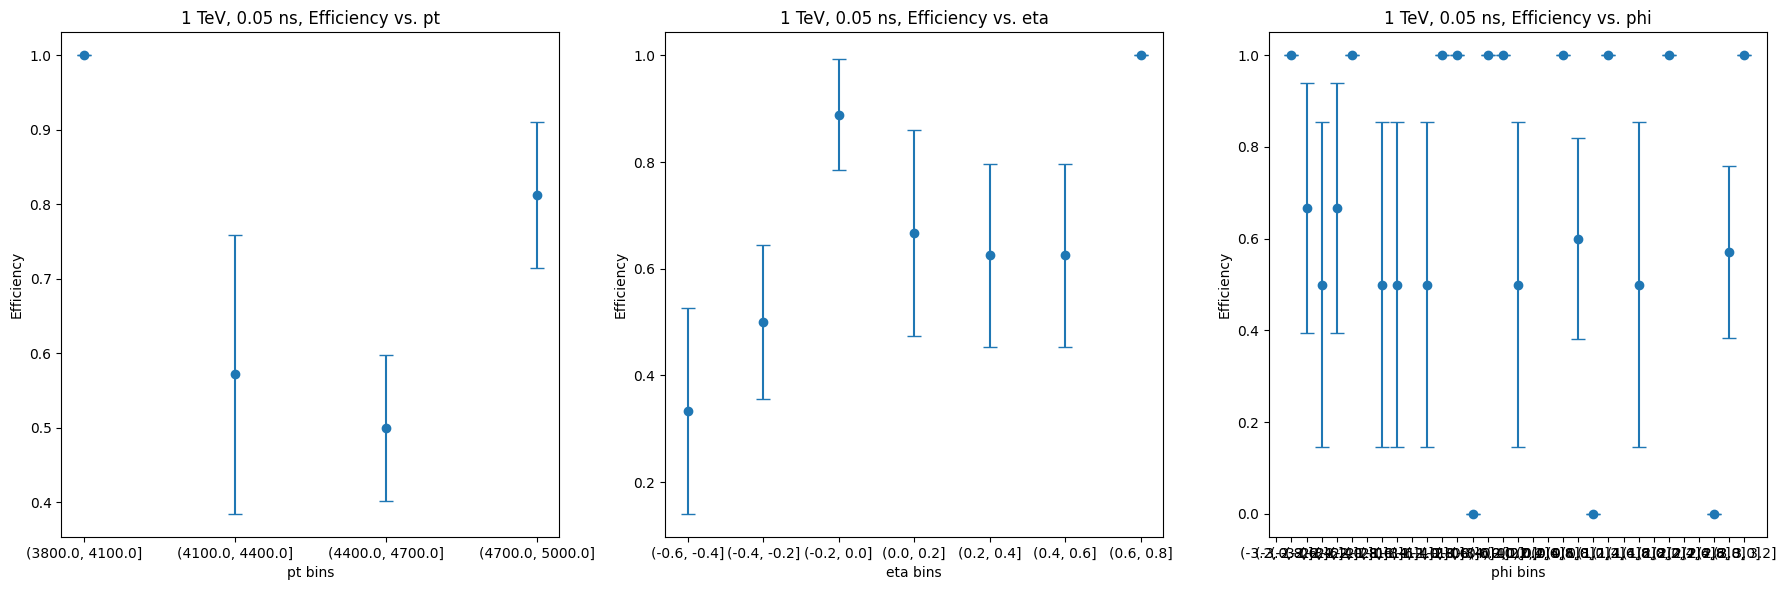

259
213


/tmp/ipykernel_659080/1852869790.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reconstructable['pt_bin'] = pd.cut(df_reconstructable['mcp_stau_pt'], bins=pt_bins)
/tmp/ipykernel_659080/1852869790.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reconstructable['eta_bin'] = pd.cut(df_reconstructable['mcp_stau_eta'], bins=eta_bins)
/tmp/ipykernel_659080/1852869790.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

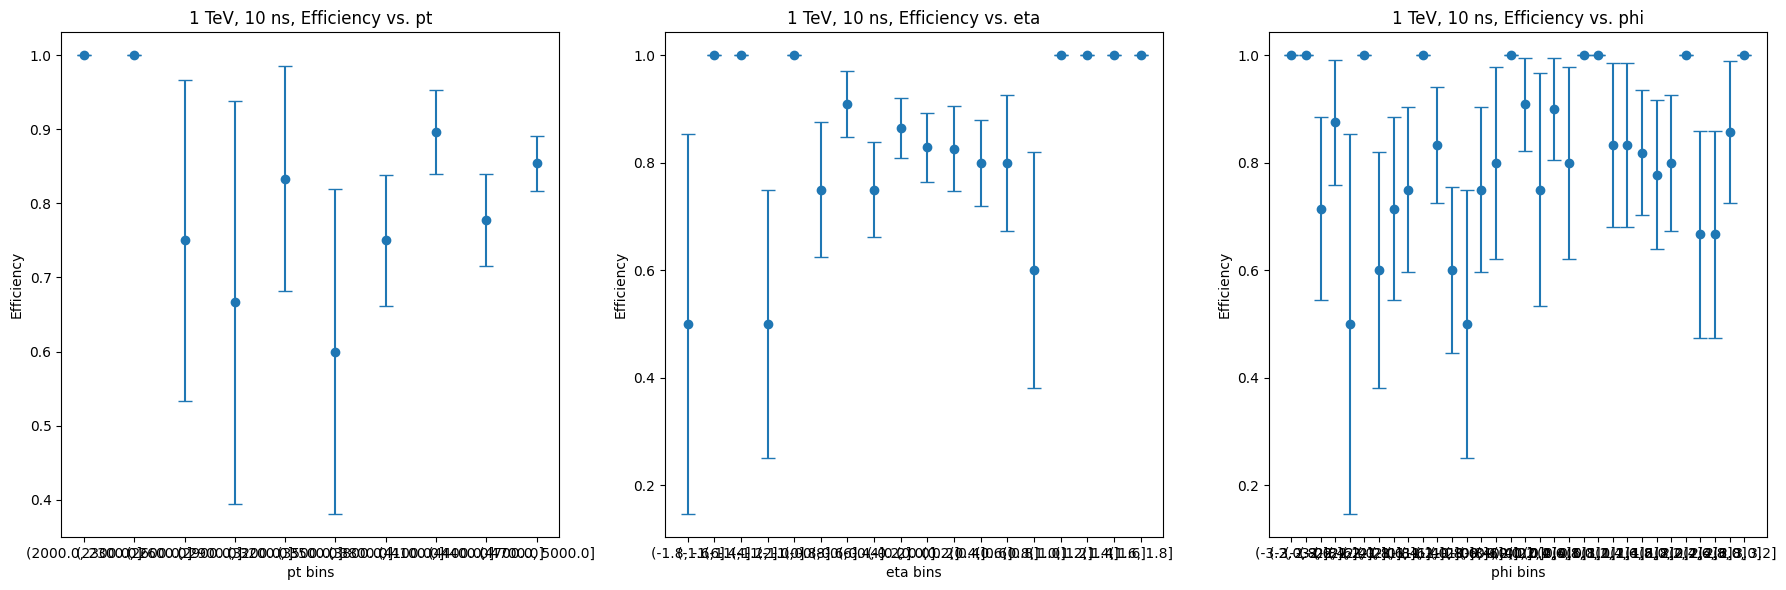

In [156]:
# Flatten the DataFrame
df_flat = pd.DataFrame({
    'mcp_stau_pt': np.concatenate(df_1000_005_stau_mcps['mcp_stau_pt'].values),
    'mcp_stau_eta': np.concatenate(df_1000_005_stau_mcps['mcp_stau_eta'].values),
    'mcp_stau_phi': np.concatenate(df_1000_005_stau_mcps['mcp_stau_phi'].values),
    'mcp_stau_track_bool': np.concatenate(df_1000_005_stau_mcps['mcp_stau_track_bool'].values),
    'mcp_stau_track_reconstructable_bool': np.concatenate(df_1000_005_stau_mcps['mcp_stau_track_reconstructable_bool'].values)
})
print(len(df_flat))
# Filter the DataFrame to only include reconstructable tracks
df_reconstructable = df_flat[df_flat['mcp_stau_track_reconstructable_bool']]
print(len(df_reconstructable))
# Define bins
pt_bins = np.linspace(2000, 5000, 11)
eta_bins = np.linspace(-2, 2, 21)
phi_bins = np.linspace(-3.2, 3.2, 33)

# Bin the data
df_reconstructable['pt_bin'] = pd.cut(df_reconstructable['mcp_stau_pt'], bins=pt_bins)
df_reconstructable['eta_bin'] = pd.cut(df_reconstructable['mcp_stau_eta'], bins=eta_bins)
df_reconstructable['phi_bin'] = pd.cut(df_reconstructable['mcp_stau_phi'], bins=phi_bins)

# Calculate efficiency and errors for each bin
def calculate_efficiency_with_errors(df, bin_column):
    grouped = df.groupby(bin_column)
    efficiency = grouped['mcp_stau_track_bool'].mean()
    counts = grouped['mcp_stau_track_bool'].count()
    errors = np.sqrt(efficiency * (1 - efficiency) / counts)
    return efficiency, errors

efficiency_pt, errors_pt = calculate_efficiency_with_errors(df_reconstructable, 'pt_bin')
efficiency_eta, errors_eta = calculate_efficiency_with_errors(df_reconstructable, 'eta_bin')
efficiency_phi, errors_phi = calculate_efficiency_with_errors(df_reconstructable, 'phi_bin')

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot efficiency vs. pt
axes[0].errorbar(x=efficiency_pt.index.astype(str), y=efficiency_pt, yerr=errors_pt, fmt='o', capsize=5)
axes[0].set_title('1 TeV, 0.05 ns, Efficiency vs. pt')
axes[0].set_xlabel('pt bins')
axes[0].set_ylabel('Efficiency')

# Plot efficiency vs. eta
axes[1].errorbar(x=efficiency_eta.index.astype(str), y=efficiency_eta, yerr=errors_eta, fmt='o', capsize=5)
axes[1].set_title('1 TeV, 0.05 ns, Efficiency vs. eta')
axes[1].set_xlabel('eta bins')
axes[1].set_ylabel('Efficiency')

# Plot efficiency vs. phi
axes[2].errorbar(x=efficiency_phi.index.astype(str), y=efficiency_phi, yerr=errors_phi, fmt='o', capsize=5)
axes[2].set_title('1 TeV, 0.05 ns, Efficiency vs. phi')
axes[2].set_xlabel('phi bins')
axes[2].set_ylabel('Efficiency')

plt.tight_layout()
plt.show()


# Flatten the DataFrame
df_flat = pd.DataFrame({
    'mcp_stau_pt': np.concatenate(df_1000_10_stau_mcps['mcp_stau_pt'].values),
    'mcp_stau_eta': np.concatenate(df_1000_10_stau_mcps['mcp_stau_eta'].values),
    'mcp_stau_phi': np.concatenate(df_1000_10_stau_mcps['mcp_stau_phi'].values),
    'mcp_stau_track_bool': np.concatenate(df_1000_10_stau_mcps['mcp_stau_track_bool'].values),
    'mcp_stau_track_reconstructable_bool': np.concatenate(df_1000_10_stau_mcps['mcp_stau_track_reconstructable_bool'].values)
})
print(len(df_flat))
# Filter the DataFrame to only include reconstructable tracks
df_reconstructable = df_flat[df_flat['mcp_stau_track_reconstructable_bool']]
print(len(df_reconstructable))
# Define bins
pt_bins = np.linspace(2000, 5000, 11)
eta_bins = np.linspace(-2, 2, 21)
phi_bins = np.linspace(-3.2, 3.2, 33)

# Bin the data
df_reconstructable['pt_bin'] = pd.cut(df_reconstructable['mcp_stau_pt'], bins=pt_bins)
df_reconstructable['eta_bin'] = pd.cut(df_reconstructable['mcp_stau_eta'], bins=eta_bins)
df_reconstructable['phi_bin'] = pd.cut(df_reconstructable['mcp_stau_phi'], bins=phi_bins)

# Calculate efficiency and errors for each bin
def calculate_efficiency_with_errors(df, bin_column):
    grouped = df.groupby(bin_column)
    efficiency = grouped['mcp_stau_track_bool'].mean()
    counts = grouped['mcp_stau_track_bool'].count()
    errors = np.sqrt(efficiency * (1 - efficiency) / counts)
    return efficiency, errors

efficiency_pt, errors_pt = calculate_efficiency_with_errors(df_reconstructable, 'pt_bin')
efficiency_eta, errors_eta = calculate_efficiency_with_errors(df_reconstructable, 'eta_bin')
efficiency_phi, errors_phi = calculate_efficiency_with_errors(df_reconstructable, 'phi_bin')

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot efficiency vs. pt
axes[0].errorbar(x=efficiency_pt.index.astype(str), y=efficiency_pt, yerr=errors_pt, fmt='o', capsize=5)
axes[0].set_title('1 TeV, 10 ns, Efficiency vs. pt')
axes[0].set_xlabel('pt bins')
axes[0].set_ylabel('Efficiency')

# Plot efficiency vs. eta
axes[1].errorbar(x=efficiency_eta.index.astype(str), y=efficiency_eta, yerr=errors_eta, fmt='o', capsize=5)
axes[1].set_title('1 TeV, 10 ns, Efficiency vs. eta')
axes[1].set_xlabel('eta bins')
axes[1].set_ylabel('Efficiency')

# Plot efficiency vs. phi
axes[2].errorbar(x=efficiency_phi.index.astype(str), y=efficiency_phi, yerr=errors_phi, fmt='o', capsize=5)
axes[2].set_title('1 TeV, 10 ns, Efficiency vs. phi')
axes[2].set_xlabel('phi bins')
axes[2].set_ylabel('Efficiency')

plt.tight_layout()
plt.show()

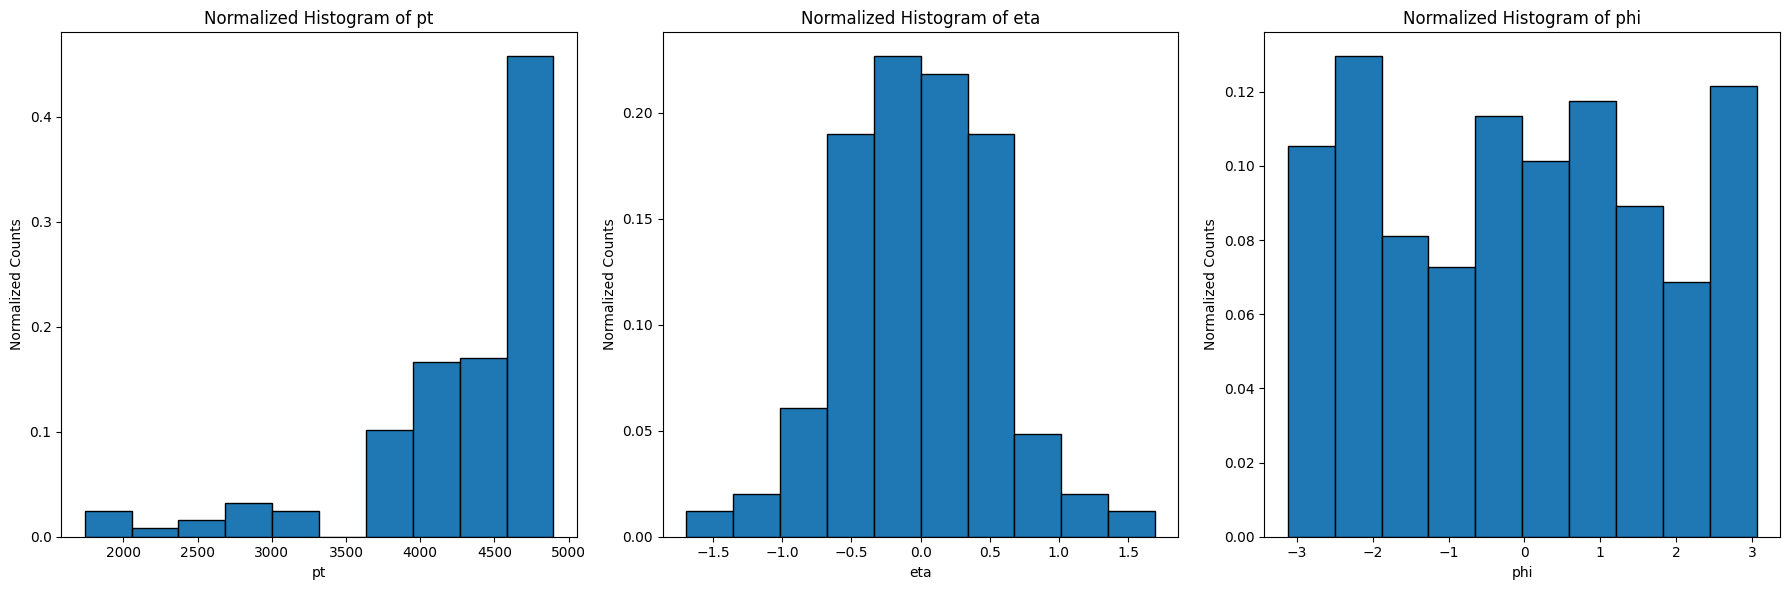

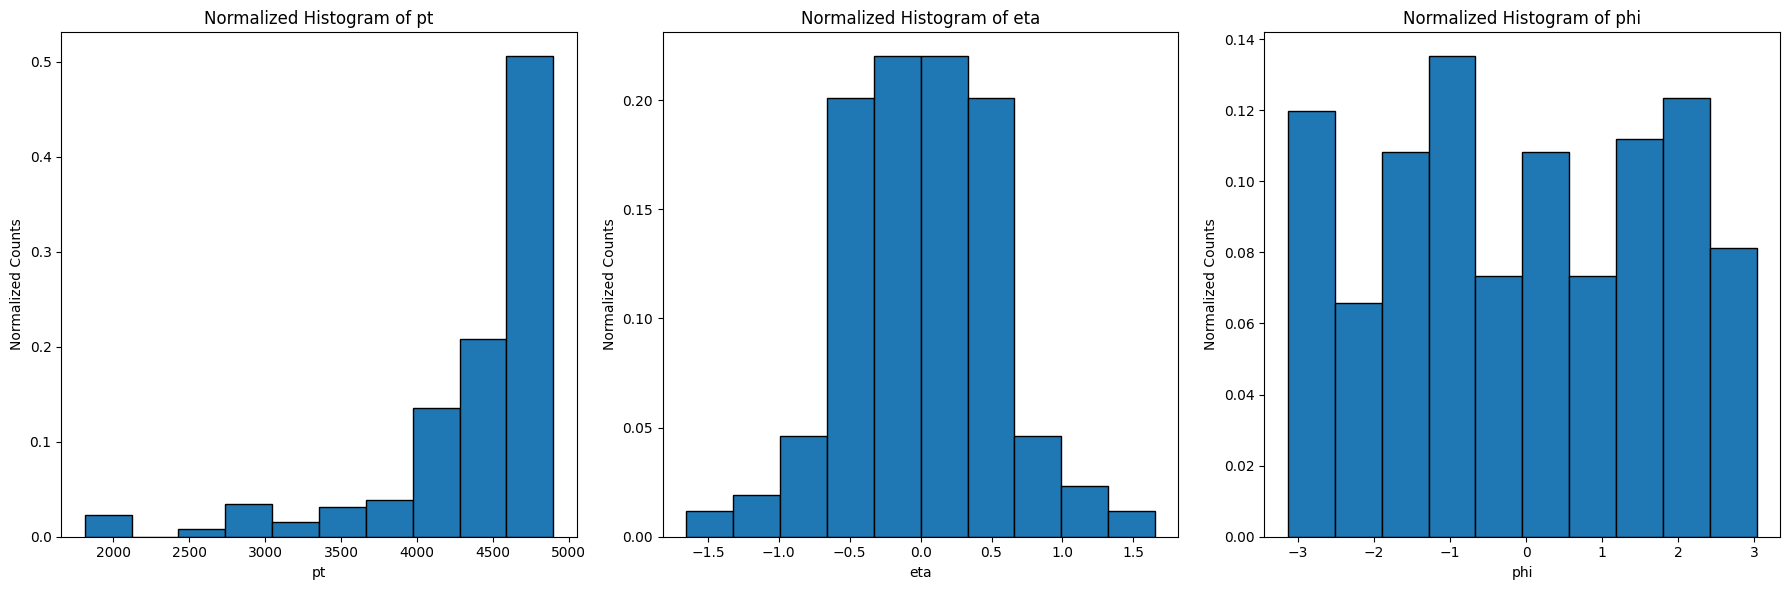

In [157]:
# Flatten the DataFrame
df_flat = pd.DataFrame({
    'mcp_stau_pt': np.concatenate(df_1000_005_stau_mcps['mcp_stau_pt'].values),
    'mcp_stau_eta': np.concatenate(df_1000_005_stau_mcps['mcp_stau_eta'].values),
    'mcp_stau_phi': np.concatenate(df_1000_005_stau_mcps['mcp_stau_phi'].values),
    'mcp_stau_track_bool': np.concatenate(df_1000_005_stau_mcps['mcp_stau_track_bool'].values),
    'mcp_stau_track_reconstructable_bool': np.concatenate(df_1000_005_stau_mcps['mcp_stau_track_reconstructable_bool'].values)
})

# Plotting histograms with normalized counts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Function to plot normalized histogram
def plot_normalized_histogram(ax, data, bins, title, xlabel):
    counts, bin_edges, _ = ax.hist(data, bins=bins, edgecolor='black', density=False)
    total_counts = counts.sum()
    normalized_counts = counts / total_counts
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    ax.clear()
    ax.bar(bin_centers, normalized_counts, width=bin_edges[1] - bin_edges[0], edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Normalized Counts')

# Plot normalized histogram of pt
plot_normalized_histogram(axes[0], df_flat['mcp_stau_pt'], bins=10, title='Normalized Histogram of pt', xlabel='pt')

# Plot normalized histogram of eta
plot_normalized_histogram(axes[1], df_flat['mcp_stau_eta'], bins=10, title='Normalized Histogram of eta', xlabel='eta')

# Plot normalized histogram of phi
plot_normalized_histogram(axes[2], df_flat['mcp_stau_phi'], bins=10, title='Normalized Histogram of phi', xlabel='phi')

plt.tight_layout()
plt.show()



# Flatten the DataFrame
df_flat = pd.DataFrame({
    'mcp_stau_pt': np.concatenate(df_1000_10_stau_mcps['mcp_stau_pt'].values),
    'mcp_stau_eta': np.concatenate(df_1000_10_stau_mcps['mcp_stau_eta'].values),
    'mcp_stau_phi': np.concatenate(df_1000_10_stau_mcps['mcp_stau_phi'].values),
    'mcp_stau_track_bool': np.concatenate(df_1000_10_stau_mcps['mcp_stau_track_bool'].values),
    'mcp_stau_track_reconstructable_bool': np.concatenate(df_1000_10_stau_mcps['mcp_stau_track_reconstructable_bool'].values)
})

# Plotting histograms with normalized counts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Function to plot normalized histogram
def plot_normalized_histogram(ax, data, bins, title, xlabel):
    counts, bin_edges, _ = ax.hist(data, bins=bins, edgecolor='black', density=False)
    total_counts = counts.sum()
    normalized_counts = counts / total_counts
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    ax.clear()
    ax.bar(bin_centers, normalized_counts, width=bin_edges[1] - bin_edges[0], edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Normalized Counts')

# Plot normalized histogram of pt
plot_normalized_histogram(axes[0], df_flat['mcp_stau_pt'], bins=10, title='Normalized Histogram of pt', xlabel='pt')

# Plot normalized histogram of eta
plot_normalized_histogram(axes[1], df_flat['mcp_stau_eta'], bins=10, title='Normalized Histogram of eta', xlabel='eta')

# Plot normalized histogram of phi
plot_normalized_histogram(axes[2], df_flat['mcp_stau_phi'], bins=10, title='Normalized Histogram of phi', xlabel='phi')

plt.tight_layout()
plt.show()

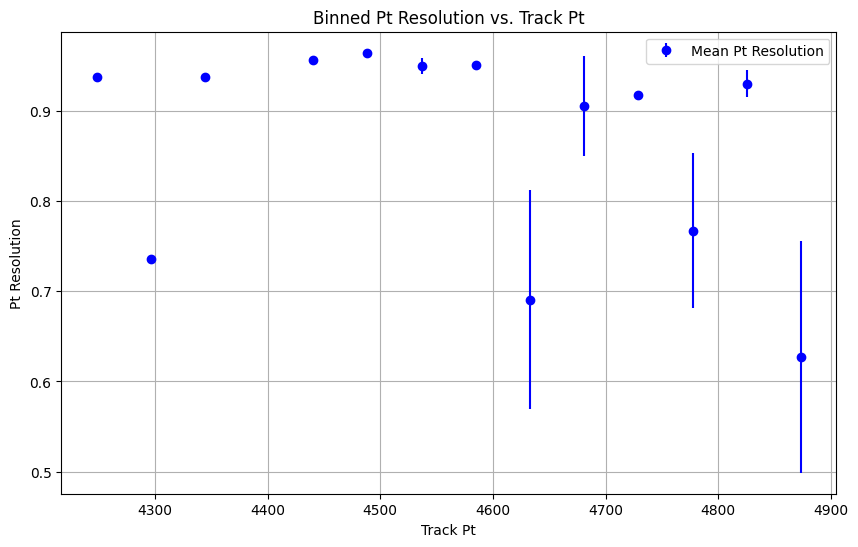

In [158]:
def binned_scatter(x, y, xlabel, ylabel, title, bins=20):
    # Bin the data
    bin_edges = np.linspace(x.min(), x.max(), bins + 1)
    bin_indices = np.digitize(x, bin_edges, right=True)
    
    # Compute mean y and count in each bin
    bin_means = []
    bin_centers = []
    errors = []
    for i in range(1, len(bin_edges)):
        bin_data = y[bin_indices == i]
        if len(bin_data) > 0:
            bin_means.append(bin_data.mean())
            bin_centers.append((bin_edges[i - 1] + bin_edges[i]) / 2)
            errors.append(np.std(bin_data) / np.sqrt(len(bin_data)))  # Standard error
        else:
            bin_means.append(np.nan)
            bin_centers.append(np.nan)
            errors.append(np.nan)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.errorbar(bin_centers, bin_means, yerr=errors, fmt='o', color='b', label='Mean Pt Resolution')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

# Binned scatter plot for pt_res vs pt
binned_scatter(df_1000_005_stau_matched['LC_stau_pt_match'], df_1000_005_stau_matched['LC_stau_pt_res'],
               xlabel='Track Pt', ylabel='Pt Resolution',
               title='1 TeV, 0.05 ns, Binned Pt Resolution vs. Track Pt')

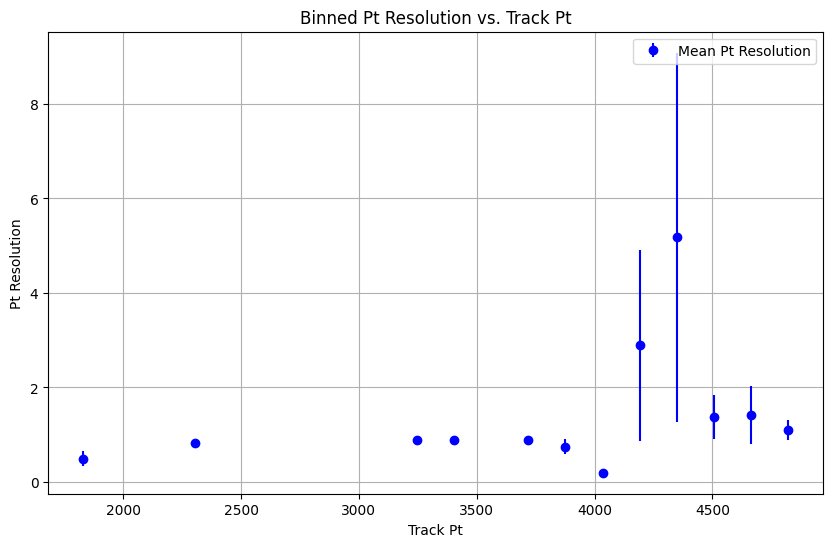

In [159]:
def binned_scatter(x, y, xlabel, ylabel, title, bins=20):
    # Bin the data
    bin_edges = np.linspace(x.min(), x.max(), bins + 1)
    bin_indices = np.digitize(x, bin_edges, right=True)
    
    # Compute mean y and count in each bin
    bin_means = []
    bin_centers = []
    errors = []
    for i in range(1, len(bin_edges)):
        bin_data = y[bin_indices == i]
        if len(bin_data) > 0:
            bin_means.append(bin_data.mean())
            bin_centers.append((bin_edges[i - 1] + bin_edges[i]) / 2)
            errors.append(np.std(bin_data) / np.sqrt(len(bin_data)))  # Standard error
        else:
            bin_means.append(np.nan)
            bin_centers.append(np.nan)
            errors.append(np.nan)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.errorbar(bin_centers, bin_means, yerr=errors, fmt='o', color='b', label='Mean Pt Resolution')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

# Binned scatter plot for pt_res vs pt
binned_scatter(df_1000_01_stau_matched['LC_stau_pt_match'], df_1000_01_stau_matched['LC_stau_pt_res'],
               xlabel='Track Pt', ylabel='Pt Resolution',
               title='1 TeV, 0.1 ns, Binned Pt Resolution vs. Track Pt')

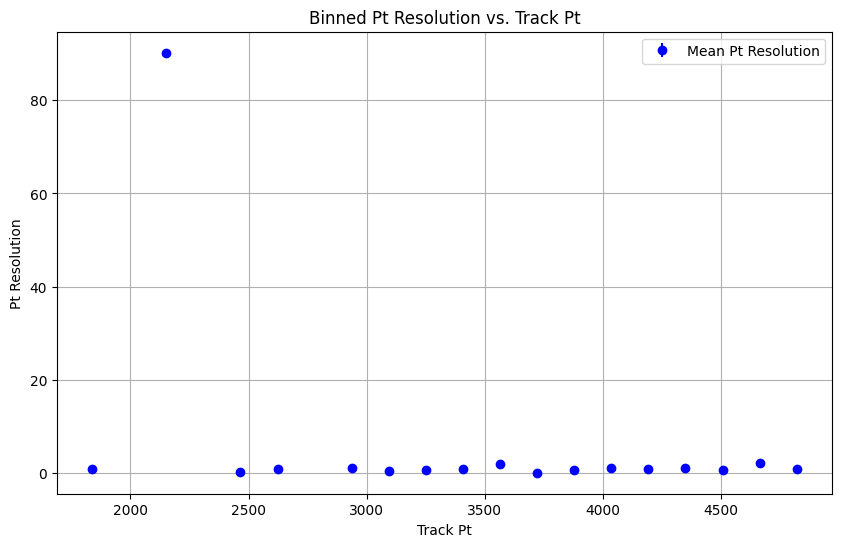

In [164]:
def binned_scatter(x, y, xlabel, ylabel, title, bins=20):
    # Bin the data
    bin_edges = np.linspace(x.min(), x.max(), bins + 1)
    bin_indices = np.digitize(x, bin_edges, right=True)
    
    # Compute mean y and count in each bin
    bin_means = []
    bin_centers = []
    errors = []
    for i in range(1, len(bin_edges)):
        bin_data = y[bin_indices == i]
        if len(bin_data) > 0:
            bin_means.append(bin_data.mean())
            bin_centers.append((bin_edges[i - 1] + bin_edges[i]) / 2)
            errors.append(np.std(bin_data) / np.sqrt(len(bin_data)))  # Standard error
        else:
            bin_means.append(np.nan)
            bin_centers.append(np.nan)
            errors.append(np.nan)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.errorbar(bin_centers, bin_means, yerr=errors, fmt='o', color='b', label='Mean Pt Resolution')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

# Binned scatter plot for pt_res vs pt
binned_scatter(df_1000_1_stau_matched['LC_stau_pt_match'], df_1000_1_stau_matched['LC_stau_pt_res'],
               xlabel='Track Pt', ylabel='Pt Resolution',
               title='1 TeV, 1 ns, Binned Pt Resolution vs. Track Pt')

In [162]:
print(max(df_1000_1_stau_matched['LC_stau_track_pt']))

190770.22516118013


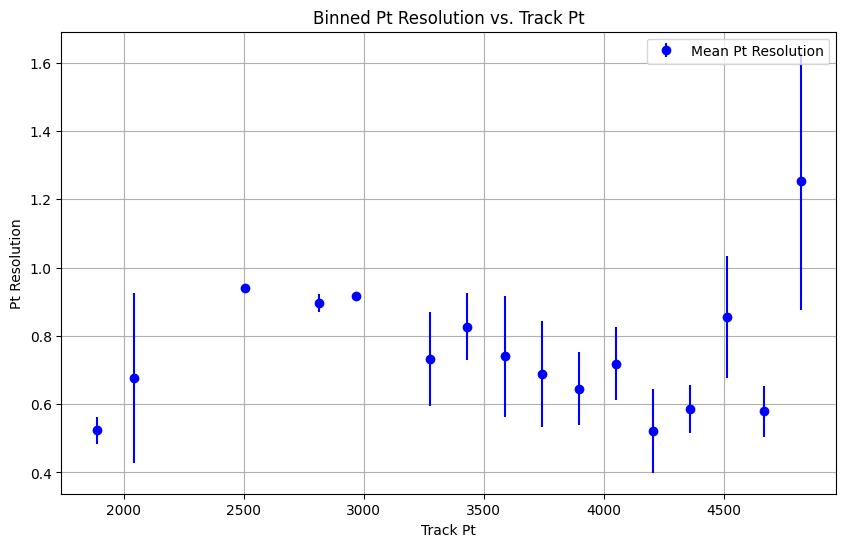

In [140]:
def binned_scatter(x, y, xlabel, ylabel, title, bins=20):
    # Bin the data
    bin_edges = np.linspace(x.min(), x.max(), bins + 1)
    bin_indices = np.digitize(x, bin_edges, right=True)
    
    # Compute mean y and count in each bin
    bin_means = []
    bin_centers = []
    errors = []
    for i in range(1, len(bin_edges)):
        bin_data = y[bin_indices == i]
        if len(bin_data) > 0:
            bin_means.append(bin_data.mean())
            bin_centers.append((bin_edges[i - 1] + bin_edges[i]) / 2)
            errors.append(np.std(bin_data) / np.sqrt(len(bin_data)))  # Standard error
        else:
            bin_means.append(np.nan)
            bin_centers.append(np.nan)
            errors.append(np.nan)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.errorbar(bin_centers, bin_means, yerr=errors, fmt='o', color='b', label='Mean Pt Resolution')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

# Binned scatter plot for pt_res vs pt
binned_scatter(df_1000_10_stau_matched['LC_stau_pt_match'], df_1000_10_stau_matched['LC_stau_pt_res'],
               xlabel='Track Pt', ylabel='Pt Resolution',
               title='1 TeV, 10 ns, Binned Pt Resolution vs. Track Pt')